1、 应用pyecharts绘制时间序列线图，并满足如下要求：

①    在图中同时展现居民消费价格月度同比涨跌、城市消费价格月度同比涨跌、农村消费价格月度同比涨跌三个指标，并用分别用红蓝绿三种颜色实线绘制

②    在图形下方展示图例

③    图题为“图一：国内CPI指数同比涨跌幅一览图（2016-2021）”

④    X轴标签为：统计时间

⑤    Y轴标签为：同比涨跌幅（%）

⑥    标识点为三角型

⑦    线条宽度为3



In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pyecharts import options as opts
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
from pyecharts.charts import Line
df = pd.read_excel('数据/CPI.xls')
df.index = df['统计时间'].values
df.drop(columns=['序号','统计时间'],axis=1,inplace=True)
line = (
    Line()
    .add_xaxis(list(df.index))
    .add_yaxis(df.columns[0],df.iloc[:,0].values,color='red',symbol='triangle',symbol_size=15)
    .add_yaxis(df.columns[1],df.iloc[:,1].values,color='green',symbol='triangle',symbol_size=20)
    .add_yaxis(df.columns[2],df.iloc[:,2].values,color='blue',symbol='triangle',symbol_size=20)
    .set_global_opts(title_opts=opts.TitleOpts(title="图一：国内CPI指数同比涨跌幅一览图（2016-2021）"),
                    xaxis_opts=opts.AxisOpts(name='统计时间',name_location='middle',name_gap=24),
                    legend_opts=opts.LegendOpts(type_='scroll'),
                    yaxis_opts=opts.AxisOpts(type_='value',name='同比涨跌幅（%）',name_location='middle'))
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False),
                    linestyle_opts=opts.LineStyleOpts(width=3))
)
line.render_notebook()

2、 绘制居民消费价格月度同比涨跌（%）时间序列折线图，并满足如下要求：

①    带有峰谷值标注，峰值用红色三角、谷值用绿色三角标示

②    标示每个峰谷值对应的时间标签

③    图题为“图二：国内CPI指数同比涨跌幅波动示意图（2016-2021）”

④    X轴标签为：统计时间

⑤    Y轴标签为：同比涨跌幅（%）

⑥    背景加网格，网格形式为”-“

⑦    图例位于左上方（标注峰值、谷值和线图的可视化标识）

如下3-4题目利用GDP.xls数据表进行绘图



In [37]:
line = (
    Line()
    .add_xaxis(list(df.index))
    .add_yaxis(df.columns[0],df.iloc[:,0].values,color='red')
    .add_yaxis(df.columns[1],df.iloc[:,1].values,color='green')
    .add_yaxis(df.columns[2],df.iloc[:,2].values,color='blue')
    .set_global_opts(title_opts=opts.TitleOpts(title="图二：国内CPI指数同比涨跌幅波动示意图（2016-2021）"),
                    legend_opts=opts.LegendOpts(type_='scroll',pos_top=25,pos_left=15),
                    xaxis_opts=opts.AxisOpts(name='统计时间',name_location='middle',name_gap=24,splitline_opts=opts.SplitLineOpts(is_show=True)),
                    yaxis_opts=opts.AxisOpts(type_='value',name='同比涨跌幅（%）',name_location='middle',splitline_opts=opts.SplitLineOpts(is_show=True))
                    )
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False),
                     markpoint_opts=opts.MarkPointOpts(data=[opts.MarkPointItem(type_='max'),opts.MarkPointItem(type_='min')],symbol='triangle',symbol_size=20))
)
line.render_notebook()

3、 绘制各季度国内生产总值相关时间序列线图，并具满足如下要求：

①    使用python对原始数据进行预处理，获得2018-2022年各季度国内生产总值及一二三产业增加值金额（非累计值），并计算各季度对应同比增降幅（非累计值）

②    绘制各季度国内生产总值（亿元）和对应同比增降幅（%）的主副坐标轴时间序列图

③    图题为“图三：各季度国内生产总值及其同比增降幅示意图（2018-2022三季度）”

④    X轴标签为：统计时间（季度）

⑤    Y轴标签为：主坐标轴国内生产总值（亿元）；副坐标轴同比涨跌幅（%）

⑥    背景加网格，网格形式为”-“



In [40]:
from pyecharts.charts import Line
df = pd.read_excel('数据/GDP.xls')
df.index = df['统计时间'].values
df.drop(columns=['序号','统计时间'],axis=1,inplace=True)
arr1 = [181867.7, 7.0, 8205.9, 3.0, 69315.5, 6.1, 104346.3, 8.0]
arr2 = [383818.0, 7.0, 20850.8, 3.5, 151638.4, 6.2, 211328.7, 8.0]
arr3 = [596607.3, 7.0, 39106.6, 3.7, 236212.5, 6.0, 321288.2, 8.2]
arr4 = [832035.9, 6.9, 62099.5, 4.0, 331580.5, 5.9, 438355.9, 8.3]
df2 = pd.DataFrame(np.insert(df.values, 0, values=[arr1,arr2,arr3,arr4], axis=0))
index1 = df.index.copy()
for i in ['2017第1季度','2017第1-2季度','2017第1-3季度','2017第1-4季度']:
    index1 = index1.insert(0,i)
df2.columns = df.columns
df2.index = index1
df_out = df2.iloc[:].copy()
for i in range(1,len(df.index)):
    if (i%4 != 0):
        df_out.iloc[i,0] = df2.iloc[i,0]- df2.iloc[i-1,0]
        df_out.iloc[i,2] = df2.iloc[i,2]- df2.iloc[i-1,2]
        df_out.iloc[i,4] = df2.iloc[i,4]- df2.iloc[i-1,4]
        df_out.iloc[i,6] = df2.iloc[i,6]- df2.iloc[i-1,6]
    else :
        df_out.iloc[i,0] = df2.iloc[i,0]
for i in range(4,len(df2.index)):
    df_out.iloc[i,1] = df2.iloc[i,0]/df2.iloc[i-4,0]
    df_out.iloc[i,3] = df2.iloc[i,2]/df2.iloc[i-4,2]
    df_out.iloc[i,5] = df2.iloc[i,4]/df2.iloc[i-4,4]
    df_out.iloc[i,7] = df2.iloc[i,6]/df2.iloc[i-4,6]
df_out = df_out.iloc[4:,:]
st = str(df_out.index.values)
st = st.replace('第1-2季度','第2季度')
st = st.replace('第1-3季度','第3季度')
st = st.replace('第1-4季度','第4季度')
line = (
    Line()
    .add_xaxis(list(df_out.index))
    .add_yaxis(df_out.columns[0],df_out.iloc[:,0].values,color='red')
    .add_yaxis(df_out.columns[1],df_out.iloc[:,1].values,color='green',yaxis_index=1)
    .extend_axis(yaxis=opts.AxisOpts(name='同比涨跌幅（%）'))
    .set_global_opts(title_opts=opts.TitleOpts(title="图三：各季度国内生产总值及其同比增降幅示意图（2018-2022三季度）"),
                    legend_opts=opts.LegendOpts(type_='scroll',pos_top=15,pos_left=15),
                    xaxis_opts=opts.AxisOpts(name='统计时间（季度）',name_location='middle',name_gap=24,splitline_opts=opts.SplitLineOpts(is_show=True)),
                    yaxis_opts=opts.AxisOpts(type_='value',name='国内生产总值（亿元）',splitline_opts=opts.SplitLineOpts(is_show=True))
                    )
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
)
line.render_notebook()

4、 使用echarts绘制各季度一二三产业堆叠线图，并满足如下要求：

①    图例在绘图的右侧

②   图题为“图四：各季度国内生产总值各产业构成堆叠线图（2018-2022三季度）

③    三产业堆叠区域颜色分别为：红蓝绿

④    X轴标签为：统计时间（季度）

⑤    Y轴标签为：主坐标轴国内生产总值（亿元）

如下5-6利用rural_population.csv文件



In [43]:
line = (
    Line()
    .add_xaxis(list(df_out.index))
    .add_yaxis(df_out.columns[2],df_out.iloc[:,2].values,color='red')
    .add_yaxis(df_out.columns[4],df_out.iloc[:,4].values,color='green')
    .add_yaxis(df_out.columns[6],df_out.iloc[:,6].values,color='blue')
    .set_global_opts(title_opts=opts.TitleOpts(title="图四：各季度国内生产总值各产业构成堆叠线图（2018-2022三季度）"),
                    legend_opts=opts.LegendOpts(type_='scroll',pos_top=25,pos_right=15),
                    xaxis_opts=opts.AxisOpts(name='统计时间（季度）',name_location='middle',name_gap=24,splitline_opts=opts.SplitLineOpts(is_show=True)),
                    yaxis_opts=opts.AxisOpts(type_='value',name='主坐标轴国内生产总值（亿元）',splitline_opts=opts.SplitLineOpts(is_show=True))
                    )
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False),)
)
line.render_notebook()

 5、 绘制农村人口户数的矩阵树形图

①    将csv文件转化为json文件格式后绘制一般树形图和矩阵树形图



In [44]:
from pyecharts.charts import TreeMap
from pyecharts.charts import Tree
import json
df = pd.read_csv('数据/rural_population.csv')
arr = []
st = ["name"]
for i in range(1,len(df.iloc[:,1])):
    dict1 = {}
    dict1[st[0]] = df.iloc[i,1]
    arr.append(dict1)
dict1 = {}
dict1 = {'children':arr,'name':"全国"}
data = [dict1]
tree = (
    Tree()
    .add(
        series_name='农村人口户数',
        data=data,        
    )
    .set_global_opts(title_opts=opts.TitleOpts(title="农村人口户数树形图"))
)
tree.render_notebook()

In [47]:
arr = []
st = ["value","name"]
for i in range(1,len(df.iloc[:,1])):
    dict1 = {}
    count = 2
    for j in st:
        if (count == 2):
            dict1[j]=int(df.iloc[i,count])
        else :
            dict1[j]=df.iloc[i,count]
        count-=1;
    arr.append(dict1)
data = arr
treemap = (
    TreeMap()
    .add(
        series_name='农村人口户数',
        data=data,        
    )
    .set_global_opts(title_opts=opts.TitleOpts(title="农村人口户数矩阵数图"))
)
treemap.render_notebook()

6、 绘制农村人口户数的华夫饼图

二、作业要求：

1、 以附件形式上传至学习通实验报告一

2、 须上传文档包括PDF格式实验报告和python代码（不限格式类型）

3、 实验报告和代码文档命名方式均为“姓名+学号”，若有附件更换重新覆盖，在文件名后标识版本号，如“姓名+学号V2”，首次上传不用标识版本

4、每次实验报告总结与分析不少于100字，各次实验的总结分析不可雷同

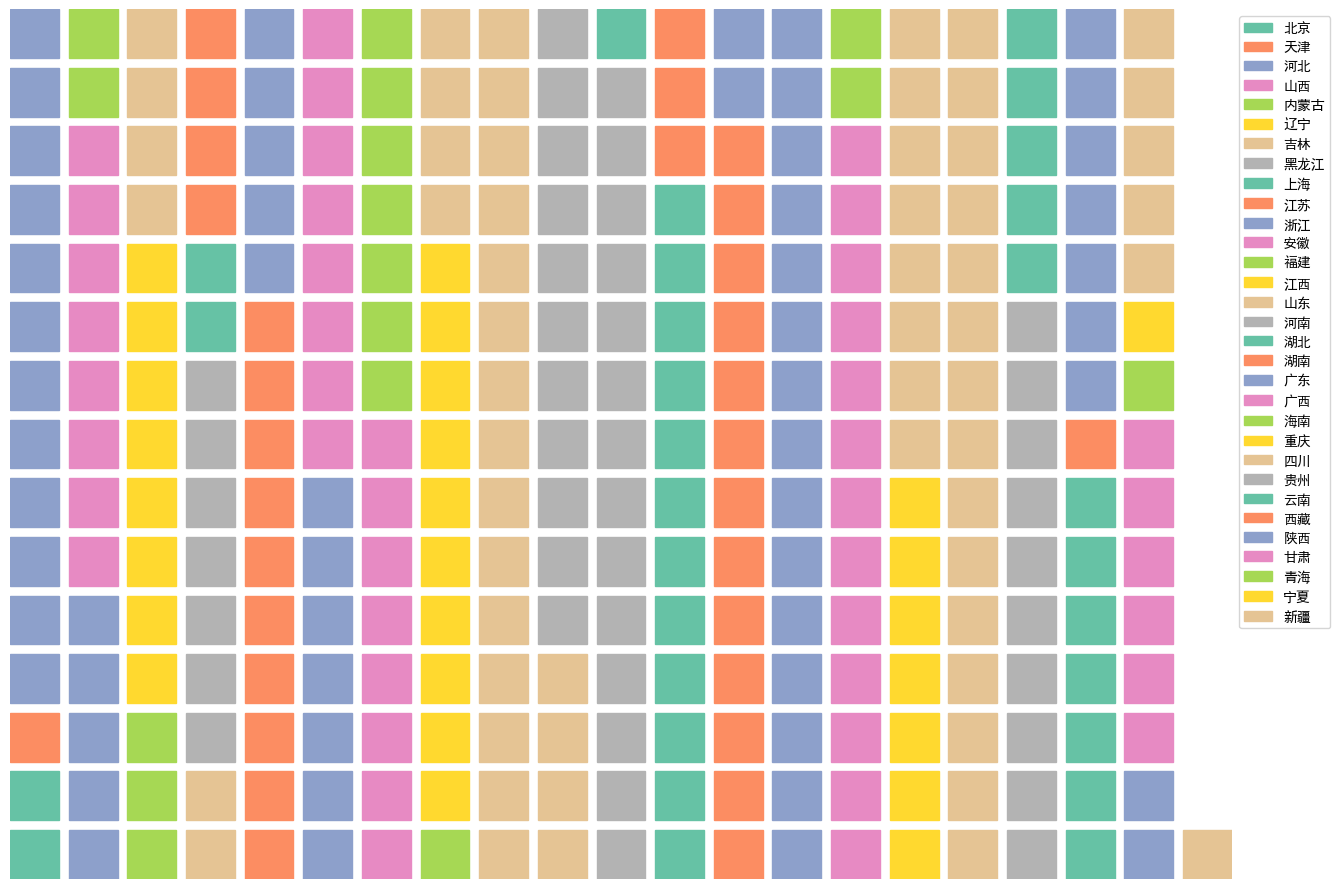

In [48]:
from pywaffle import Waffle
import matplotlib.pyplot as plt
dict1 = {}
for i in range(1,len(df.iloc[:,1])):
    num = df.iloc[i,2]/df.iloc[0,2]*300
    dict1[df.iloc[i,1]] = num
fig = plt.figure(
    FigureClass=Waffle,
    rows=15,
    values=dict1,
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    dpi=100,
    figsize=(16, 9),
)